In [290]:
from PIL import Image
import numpy as np
from algorithme.admmp2 import ADMMP2

In [312]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [313]:
x = np.array(Image.open('../image/jerem.jfif').convert('L'))
xref = x
h = 1/16 * np.array([[1,2,1],
                     [2,4,2],
                     [1,2,1]])

h = np.ones((15,15))
h = h / np.linalg.norm(h)**2

In [314]:
x_max = np.max(x/255.)
lambd = 1e-10
mu = 2e-4
nu_min = 3e-4
nu = 2**8 * lambd * nu_min/(mu*x_max)

In [317]:
algo = ADMMP2(x/255., h, lambd=lambd, mu=mu, nu=nu)

In [318]:
y = algo.gaussian_filter_2d()

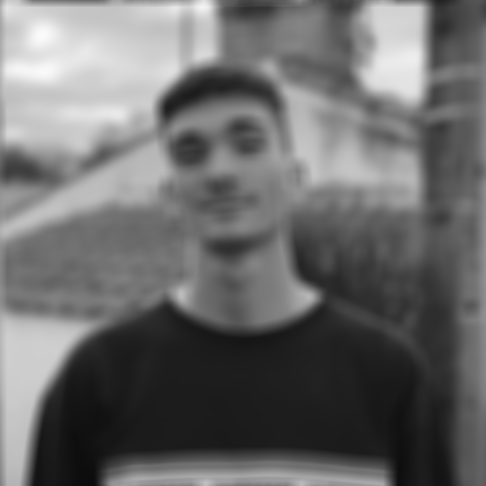

In [319]:
Image.fromarray(np.uint8(y*255))

In [277]:
X_, iter,tabError,tabTime = algo.fit_transform(y, eps=10e-3, stop=40)

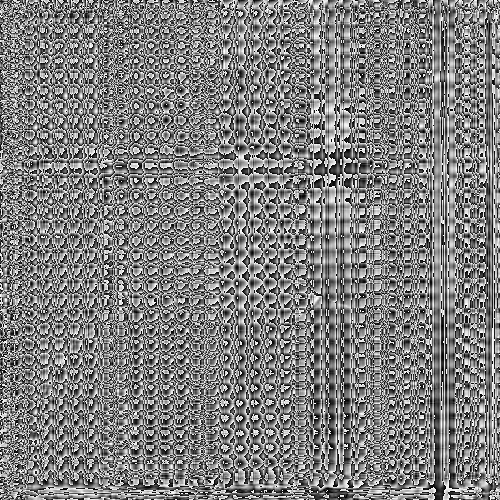

In [278]:
Image.fromarray(np.uint8(X_*255))

In [335]:
algo.nu = 1e-24

In [336]:
x = algo.x
xref = algo.x
mask = np.full(y.shape, 1/(1+algo.mu))
mask = np.pad(mask, pad_width=((x.shape[0] - y.shape[0])//2, (x.shape[1] - y.shape[1])//2), mode='constant', constant_values=1/algo.mu)
pre_comput_Ty = algo._precompute_matrix(x, y, algo.mu)

eta0= np.zeros(x.shape)
x = pre_comput_Ty
u0 = np.multiply(mask, pre_comput_Ty + algo.mu * (algo.fft_dot(x, algo.A_fft) + eta0))
rx, slices = algo.wavelet_transform(x)
eta1 = np.zeros(rx.shape)
u1 = pywt.threshold(rx + eta1, algo.lambd/(algo.mu*algo.nu), mode='soft')
x_ = algo.fft_dot(algo.fft_dot_adj(u0 - eta0, algo.A_fft) + algo.nu * algo.wavelet_transform_adjoint(u1 - eta1, slices), algo.H_nu_inv)
eta0 = eta0 - u0 + algo.fft_dot(x_, algo.A_fft)
rx, _ = algo.wavelet_transform(x_)
eta1 = eta1 - u1 + rx

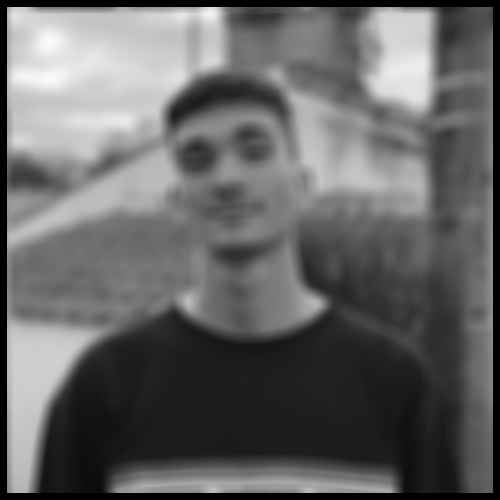

In [337]:
Image.fromarray(np.uint8(pre_comput_Ty*255))

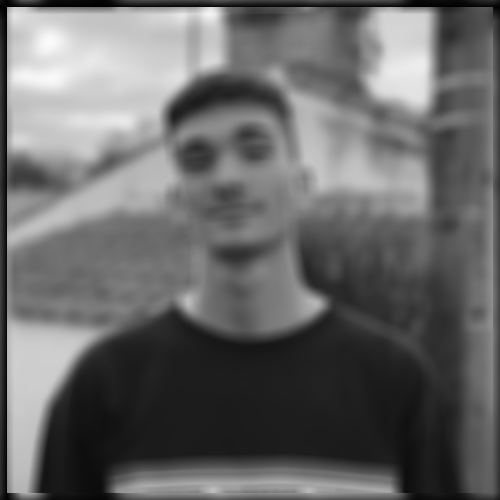

In [338]:
Image.fromarray(np.uint8(u0*255))

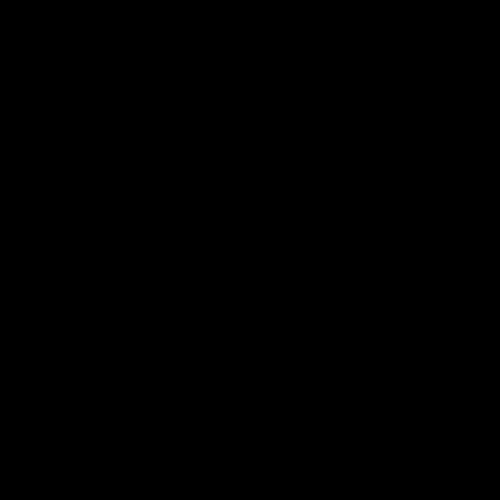

In [339]:
Image.fromarray(np.uint8(algo.wavelet_transform_adjoint(u1, slices)*255))

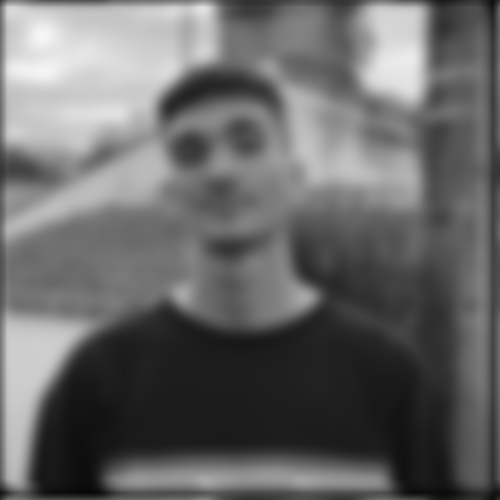

In [340]:
Image.fromarray(np.uint8((algo.fft_dot_adj((u0 - eta0), algo.A_fft) + algo.nu * algo.wavelet_transform_adjoint(u1 - eta1, slices))*255))

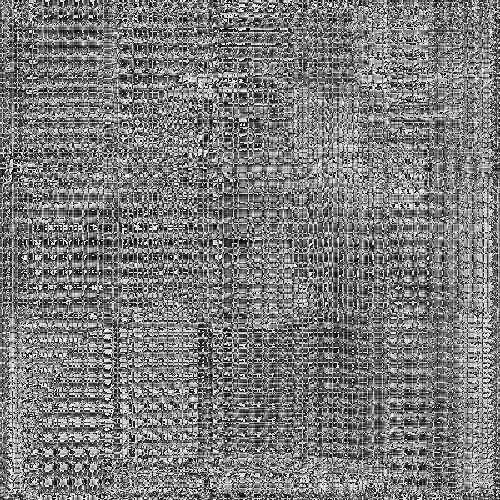

In [341]:
Image.fromarray(np.uint8(x_*255))

In [332]:
1/(np.full((2,2), 2)+1e-8)

array([[0.5, 0.5],
       [0.5, 0.5]])